In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from modules.forecasting.models.sarimax import SarimaxModel
from modules.forecasting.data.preprocess_coin import CoinPreprocessor
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
from pathlib import Path
import pandas as pd

model_dir = Path(r"D:\python_projects\crypto-analytics-platform\src\modules\forecasting\models\saved\sarimax")

model = SarimaxModel("ETH", model_dir=model_dir)
model.load()  

forecast = model.forecast(steps=7, last_date=pd.Timestamp.utcnow())
print(forecast)


2025-10-01 08:22:14.151997+00:00    0.859487
2025-10-02 08:22:14.151997+00:00    0.859459
2025-10-03 08:22:14.151997+00:00    0.859467
2025-10-04 08:22:14.151997+00:00    0.859464
2025-10-05 08:22:14.151997+00:00    0.859465
2025-10-06 08:22:14.151997+00:00    0.859465
2025-10-07 08:22:14.151997+00:00    0.859465
Freq: D, Name: predicted_mean, dtype: float64


In [28]:
cp = CoinPreprocessor()
hist_df = cp.load_features_series("ETH", exchange="binance", interval="1h")  
series = hist_df["close"] 
print("history length:", len(series))

history length: 2966


In [29]:
print(series.describe())

count    2966.000000
mean        0.317049
std         0.268325
min         0.000000
25%         0.045326
50%         0.314371
75%         0.519638
max         1.000000
Name: close, dtype: float64


In [30]:
returns = series.pct_change().dropna()
print(returns.describe())

count    2965.000000
mean             inf
std              NaN
min        -1.000000
25%        -0.023890
50%         0.000897
75%         0.028100
max              inf
Name: close, dtype: float64


c:\Users\sarfras\anaconda3\envs\crypto\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [31]:
volatility = returns.rolling(24*7).std()  
print(volatility.describe())

count    2630.000000
mean        0.058207
std         0.033696
min         0.019471
25%         0.037536
50%         0.051367
75%         0.069464
max         0.807682
Name: close, dtype: float64


In [32]:
forecast = model.forecast(steps=14, last_date=series.index[-1])
print("forecast index:", forecast.index)

forecast index: DatetimeIndex(['2025-09-30 00:00:00+00:00', '2025-10-01 00:00:00+00:00',
               '2025-10-02 00:00:00+00:00', '2025-10-03 00:00:00+00:00',
               '2025-10-04 00:00:00+00:00', '2025-10-05 00:00:00+00:00',
               '2025-10-06 00:00:00+00:00', '2025-10-07 00:00:00+00:00',
               '2025-10-08 00:00:00+00:00', '2025-10-09 00:00:00+00:00',
               '2025-10-10 00:00:00+00:00', '2025-10-11 00:00:00+00:00',
               '2025-10-12 00:00:00+00:00', '2025-10-13 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')


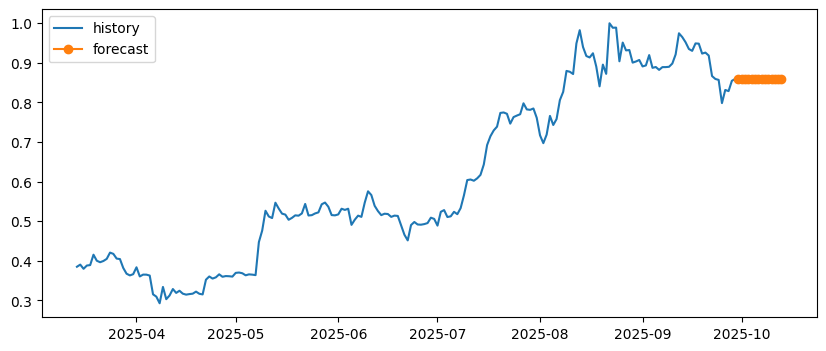

In [33]:
plt.figure(figsize=(10,4))
plt.plot(series.tail(200), label="history")
plt.plot(forecast.index, forecast.values, marker="o", label="forecast")
plt.legend(); plt.show()

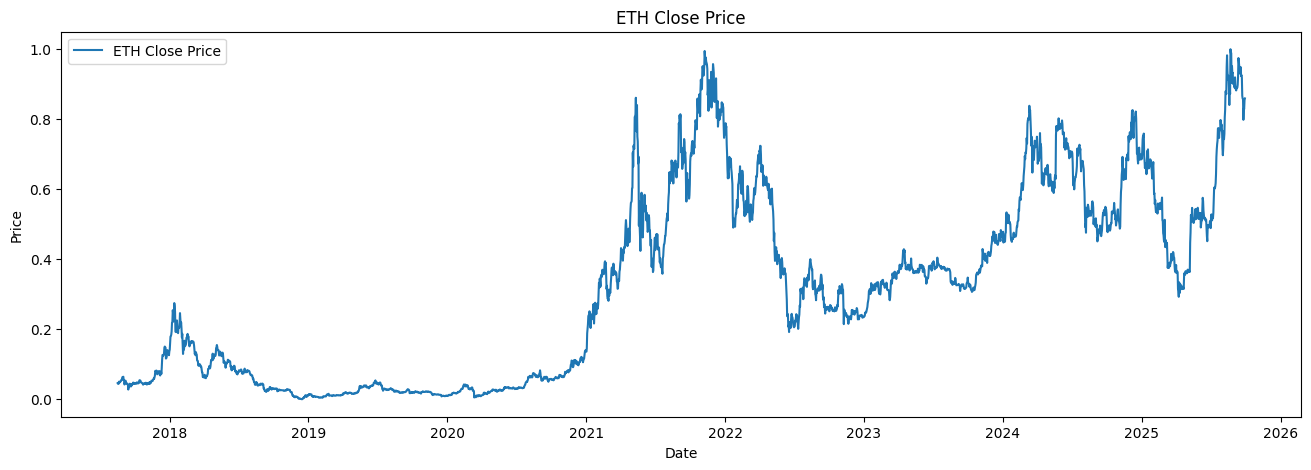

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
plt.plot(series, label="ETH Close Price")
plt.title("ETH Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

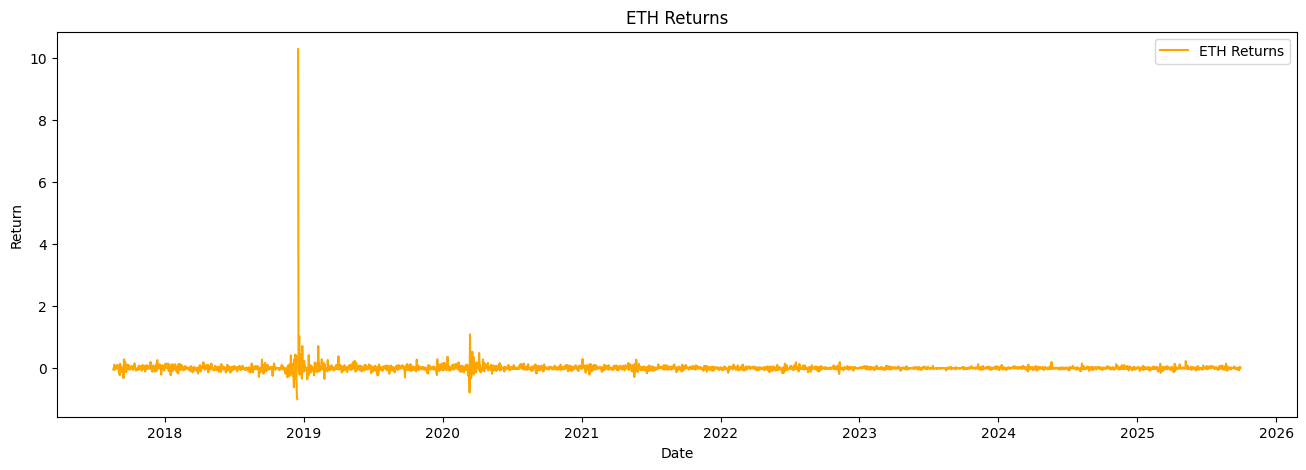

In [35]:
plt.figure(figsize=(16,5))
plt.plot(returns, label="ETH Returns", color='orange')
plt.title("ETH Returns")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend()
plt.show()

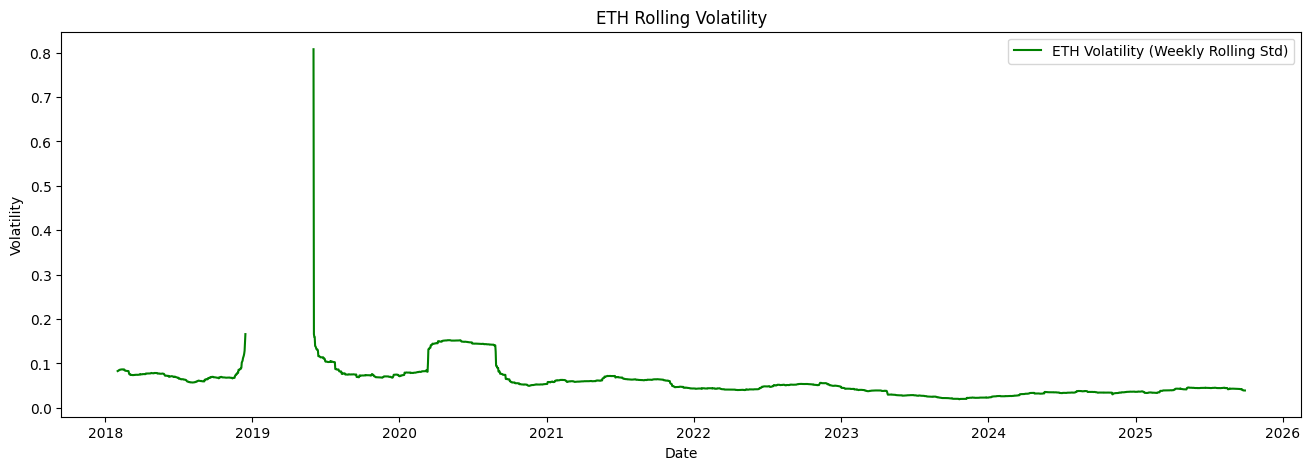

In [36]:
plt.figure(figsize=(16,5))
plt.plot(volatility, label="ETH Volatility (Weekly Rolling Std)", color='green')
plt.title("ETH Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

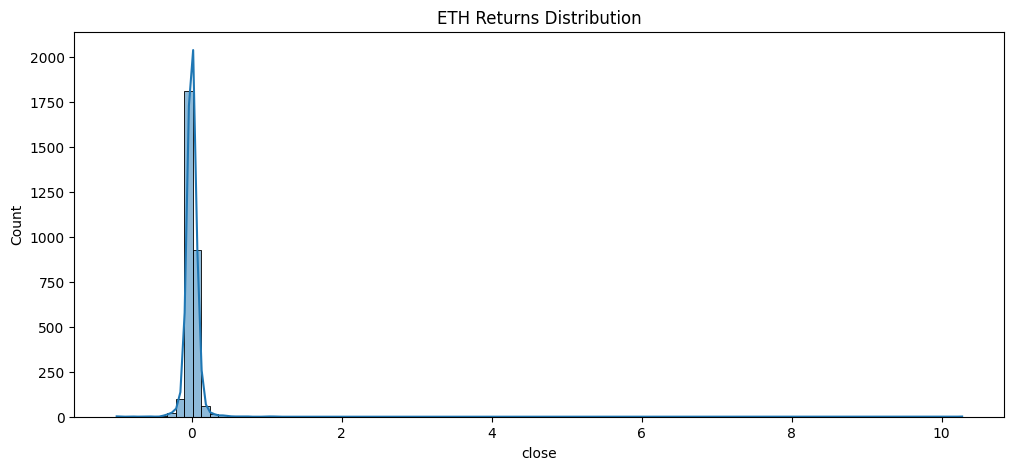

In [37]:
plt.figure(figsize=(12,5))
sns.histplot(returns, bins=100, kde=True)
plt.title("ETH Returns Distribution")
plt.show()

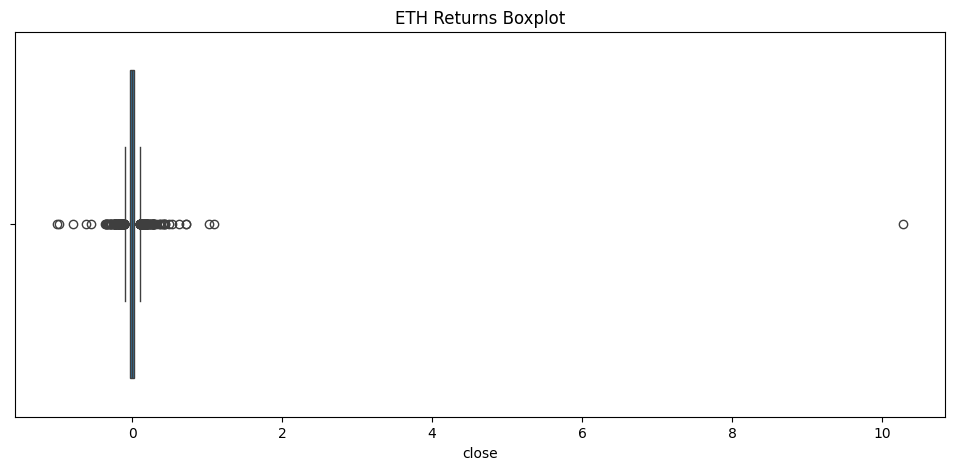

In [39]:
plt.figure(figsize=(12,5))
sns.boxplot(x=returns)
plt.title("ETH Returns Boxplot")
plt.show()

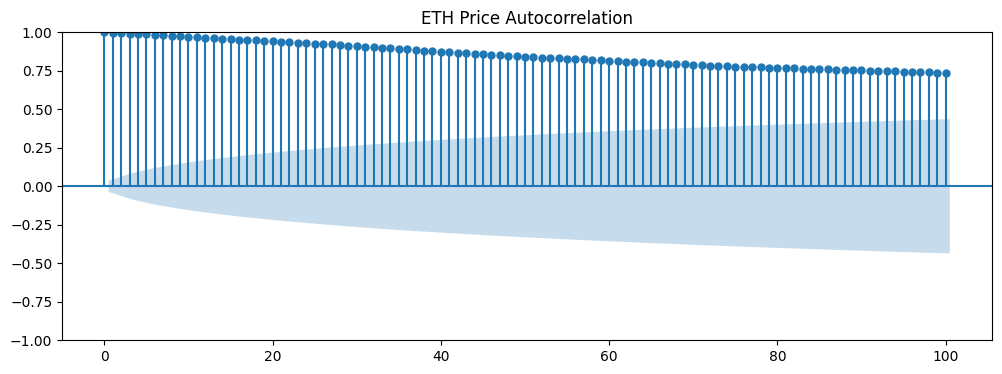

In [41]:
plt.figure(figsize=(12,4))
plot_acf(series.dropna(), lags=100, ax=plt.gca())
plt.title("ETH Price Autocorrelation")
plt.show()

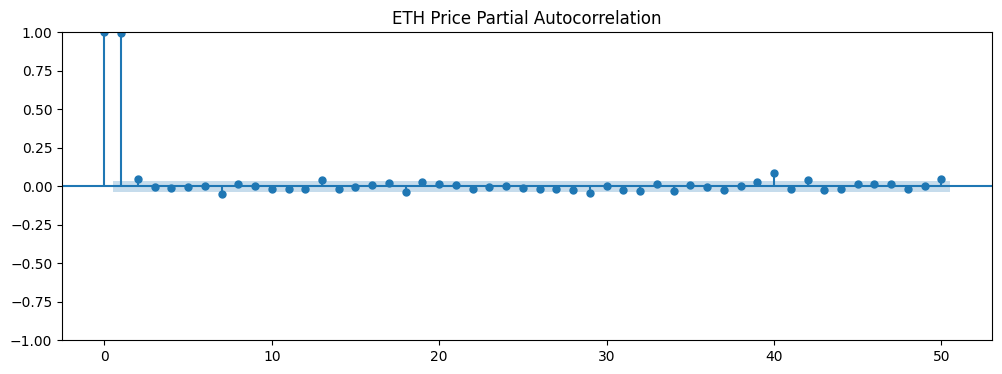

In [43]:
plt.figure(figsize=(12,4))
plot_pacf(series.dropna(), lags=50, ax=plt.gca())
plt.title("ETH Price Partial Autocorrelation")
plt.show()

c:\Users\sarfras\anaconda3\envs\crypto\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


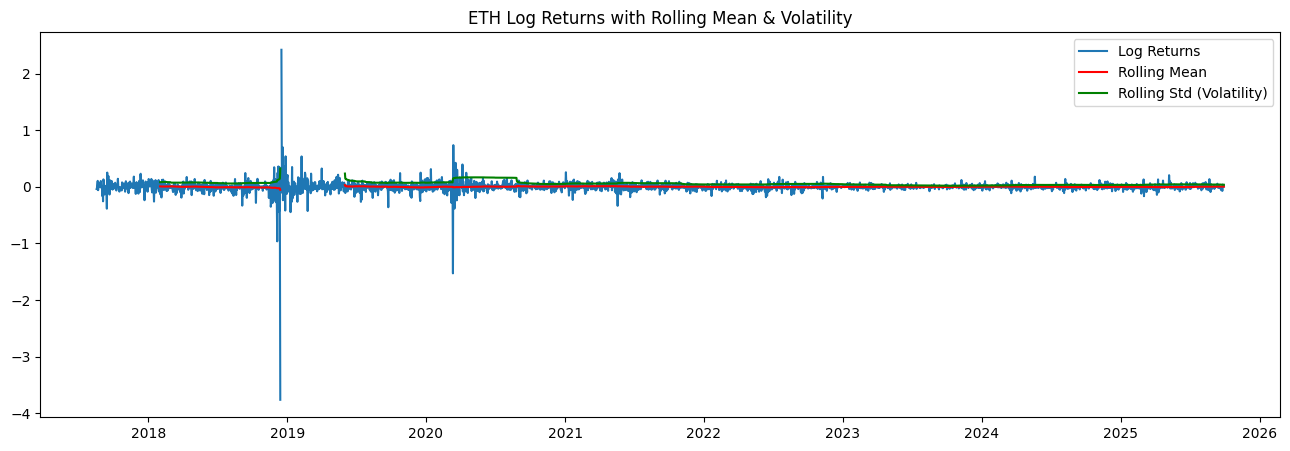

In [45]:
log_returns = np.log(series / series.shift(1)).dropna()
rolling_mean = log_returns.rolling(24*7).mean()
rolling_std = log_returns.rolling(24*7).std()

plt.figure(figsize=(16,5))
plt.plot(log_returns, label='Log Returns')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std (Volatility)', color='green')
plt.title("ETH Log Returns with Rolling Mean & Volatility")
plt.legend()
plt.show()

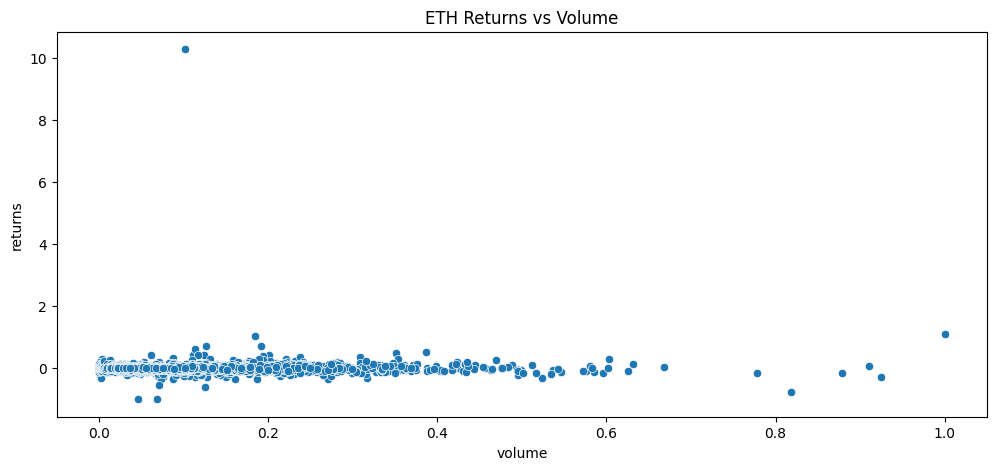

In [51]:
hist_df['returns'] = hist_df['close'].pct_change()
plt.figure(figsize=(12,5))
sns.scatterplot(x=hist_df['volume'], y=hist_df['returns'])
plt.title("ETH Returns vs Volume")
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2966
Model:               SARIMAX(1, 1, 1)   Log Likelihood                7796.257
Date:                Tue, 30 Sep 2025   AIC                         -15586.514
Time:                        13:53:46   BIC                         -15568.532
Sample:                    08-17-2017   HQIC                        -15580.042
                         - 09-29-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2803      0.145     -1.932      0.053      -0.565       0.004
ma.L1          0.2192      0.148      1.478      0.139      -0.071       0.510
sigma2         0.0003    3.1e-06     97.885      0.0

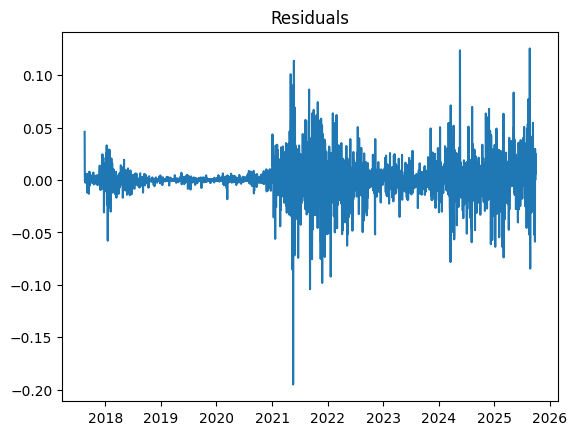

In [52]:
print(model.model_fit.summary())
resid = model.model_fit.resid
plt.figure(); plt.plot(resid); plt.title("Residuals"); plt.show()